<a href="https://colab.research.google.com/github/WalterTheDataAnalyst/Analysis-for-soccer-players/blob/main/ADC_Estimating_Life_Insurance_Liabilites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first mount our colab file to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import permitted third party libraries pandas, numpy and matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Export to Excel
from google.colab import files

# Loading Datasets.

In [ ]:
# Load the policy_schedules from CSV files
policy_schedules = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Actuarial Model Development Question and Data/policy_schedules.csv')
# Load the mortality tables for male and female from CSV files
mortality_female = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Actuarial Model Development Question and Data/mortality_female.csv')
mortality_male = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Actuarial Model Development Question and Data/mortality_male.csv')

# Datasets Exploration

# Explore policy_schedules dataset
Data exploration helps in understanding the structure, quality, and distribution of the dataset, and identify missing values and outliers. It reveals relationships between variables and informs data preprocessing steps. This process ensures the data is accurate and reliable, guiding hypothesis formulation.

In [ ]:
policy_schedules.head()

,Policy Number,Date Of Entry,Date Of Birth,Annual Premium,Premium Frequency,Gender,Product,Sum Assured
0,13L00MGBX32JA9UB7,2023-10-19,1990-06-08,153,Monthly,Male,Product B,2600.0
1,CHK9YXMU00P0RZMMM,2023-10-19,1987-05-31,447,Monthly,Male,Product C,11200.0
2,KLAD08BZ20CA09TMZ,2019-06-15,1985-08-02,299,Monthly,Male,Product C,4500.0
3,AB921HXW2WJ2LSAEV,2021-04-14,1997-01-19,635,Quarterly,Male,Product A,6400.0
4,T38JTT7Z5G6UYT0G5,2021-12-02,1982-07-21,729,Annually,Male,Product A,9500.0


Use head() to have a feel on the the dataset and how it looks like.

In [ ]:
policy_schedules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Policy Number      10000 non-null  object 
 1   Date Of Entry      10000 non-null  object 
 2   Date Of Birth      10000 non-null  object 
 3   Annual Premium     10000 non-null  int64  
 4   Premium Frequency  10000 non-null  object 
 5   Gender             10000 non-null  object 
 6   Product            10000 non-null  object 
 7   Sum Assured        10000 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


The DataFrame has 10,000 rows and 8 columns with no missing values. It includes columns with data types: 6 object (strings), 1 int64 (integer), and 1 float64 (floating-point number).

In [ ]:
policy_schedules.describe()

,Annual Premium,Sum Assured
count,10000.000000,10000.000000
mean,620.094700,9299.560000
std,332.096946,6331.626075
min,50.000000,300.000000
25%,331.000000,4300.000000
50%,616.000000,8100.000000
75%,907.250000,12900.000000
max,1199.000000,46900.000000


The dataset has 10,000 entries. The Annual Premium has a mean of 620.09 and ranges from 50 to 1199, while the Sum Assured has a mean of 9299.56 and ranges from 300 to 46,900. The data shows typical variability with standard deviations of 332.10 for Annual Premium and 6331.63 for Sum Assured

# Explore mortality_female dataset

In [ ]:
mortality_female.head()

,age,qx
0,20,0.000203
1,21,0.000202
2,22,0.000202
3,23,0.000202
4,24,0.000202


In [ ]:
mortality_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     101 non-null    int64  
 1   qx      101 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


The DataFrame has 101 rows and 2 columns (age and qx), with no missing values. The age column is of type integer (int64), and the qx column is of type float (float64).

In [ ]:
mortality_female.describe()

,age,qx
count,101.000000,101.000000
mean,70.000000,0.109994
std,29.300171,0.168800
min,20.000000,0.000202
25%,45.000000,0.000662
50%,70.000000,0.017371
75%,95.000000,0.173519
max,120.000000,1.000000


The DataFrame has 101 entries. The age column ranges from 20 to 120 years with a mean of 70. The qx column ranges from 0.000202 to 1.000 with a mean of 0.1100. The age shows a wide range and variability, while qx varies more subtly.

# Explore mortality_male dataset

In [ ]:
mortality_male.head()

,age,qx
0,20,0.000340
1,21,0.000338
2,22,0.000337
3,23,0.000335
4,24,0.000334


In [ ]:
mortality_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     102 non-null    int64  
 1   qx      102 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


The DataFrame has 102 rows and 2 columns (age and qx), with no missing values. The age column is of type integer (int64), and the qx column is of type float (float64).

In [ ]:
mortality_male.describe()

,age,qx
count,102.000000,102.000000
mean,70.490196,0.144658
std,29.572112,0.207777
min,20.000000,0.000331
25%,45.250000,0.000710
50%,70.500000,0.025519
75%,95.750000,0.259586
max,120.000000,1.000000


The DataFrame has 102 entries. The age column ranges from 20 to 120 years with a mean of 70.49. The qx column ranges from 0.000331 to 1.000 with a mean of 0.1447. Both columns show significant variability, with qx having a broader range of values.

# 1. Data Cleaning
Clean the dataset and explain your decisions regarding techniques used.

In [ ]:
# Check for missing values and handle them appropriately
policy_schedules.isnull().sum()

Policy Number        0
Date Of Entry        0
Date Of Birth        0
Annual Premium       0
Premium Frequency    0
Gender               0
Product              0
Sum Assured          0
dtype: int64

We check the total of missing values in each column and the result shows that they are no missing values

In [ ]:
# Convert date columns to datetime
policy_schedules['Date Of Entry'] = pd.to_datetime(policy_schedules['Date Of Entry'], format='%Y-%m-%d')
policy_schedules['Date Of Birth'] = pd.to_datetime(policy_schedules['Date Of Birth'], format='%Y-%m-%d')

Convert date columns to datetime so that we can perfom numerical calculation to get Age on the next step below

In [ ]:
# Calculate age
policy_schedules['age'] = (policy_schedules['Date Of Entry'] - policy_schedules['Date Of Birth']).dt.days // 365


In [ ]:
policy_schedules.head()

,Policy Number,Date Of Entry,Date Of Birth,Annual Premium,Premium Frequency,Gender,Product,Sum Assured,age
0,13L00MGBX32JA9UB7,2023-10-19,1990-06-08,153,Monthly,Male,Product B,2600.0,33
1,CHK9YXMU00P0RZMMM,2023-10-19,1987-05-31,447,Monthly,Male,Product C,11200.0,36
2,KLAD08BZ20CA09TMZ,2019-06-15,1985-08-02,299,Monthly,Male,Product C,4500.0,33
3,AB921HXW2WJ2LSAEV,2021-04-14,1997-01-19,635,Quarterly,Male,Product A,6400.0,24
4,T38JTT7Z5G6UYT0G5,2021-12-02,1982-07-21,729,Annually,Male,Product A,9500.0,39


In [ ]:
# Add gender-specific mortality rates to the policy data
policy_schedules_male = policy_schedules[policy_schedules['Gender'] == 'Male'].merge(mortality_male,left_on="age" ,right_on='age', how='left')
policy_schedules_female = policy_schedules[policy_schedules['Gender'] == 'Female'].merge(mortality_female, left_on='age',right_on='age', how='left')

 Add gender-specific mortality rates to the policy data our aim to come up with a combined dataset with all the incorporated mortality rates in relation to a specific date

In [ ]:
# Combine the datasets back together
policy_schedules_combined = pd.concat([policy_schedules_male, policy_schedules_female])

Now we combine our dataset of male and female together as one.

In [ ]:
policy_schedules_combined.head()

,Policy Number,Date Of Entry,Date Of Birth,Annual Premium,Premium Frequency,Gender,Product,Sum Assured,age,qx
0,13L00MGBX32JA9UB7,2023-10-19,1990-06-08,153,Monthly,Male,Product B,2600.0,33,0.000343
1,CHK9YXMU00P0RZMMM,2023-10-19,1987-05-31,447,Monthly,Male,Product C,11200.0,36,0.000367
2,KLAD08BZ20CA09TMZ,2019-06-15,1985-08-02,299,Monthly,Male,Product C,4500.0,33,0.000343
3,AB921HXW2WJ2LSAEV,2021-04-14,1997-01-19,635,Quarterly,Male,Product A,6400.0,24,0.000334
4,T38JTT7Z5G6UYT0G5,2021-12-02,1982-07-21,729,Annually,Male,Product A,9500.0,39,0.000417


In [ ]:
policy_schedules_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 4970
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Policy Number      10000 non-null  object        
 1   Date Of Entry      10000 non-null  datetime64[ns]
 2   Date Of Birth      10000 non-null  datetime64[ns]
 3   Annual Premium     10000 non-null  int64         
 4   Premium Frequency  10000 non-null  object        
 5   Gender             10000 non-null  object        
 6   Product            10000 non-null  object        
 7   Sum Assured        10000 non-null  float64       
 8   age                10000 non-null  int64         
 9   qx                 9948 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 859.4+ KB


Now we have used info() function to chech data types, Non Null Count associated with each specific column

In [ ]:
policy_schedules_combined['Product'].unique()

array(['Product B', 'Product C', 'Product A', 'Product A ', 'C', 'A', 'B'],
      dtype=object)

We have problem with Product column it contains 7 different entries instead of 3 hence we need to solve that and make sure we only have three required elemnts under the product column

In [ ]:
def clean_product(product):
  if product =="A" :
    return "Product A"
  elif  product =="B" :
    return "Product B"
  elif  product =="C" :
    return "Product C"  # Removed unnecessary assignment
  else:
    return product

policy_schedules_combined['Product'] = policy_schedules_combined['Product'].apply(clean_product) # Applied the function to the 'Product' column

In [ ]:
policy_schedules_combined['Product'].unique()

array(['Product B', 'Product C', 'Product A', 'Product A '], dtype=object)

We still have another problem with Entry product A under product column. So we need to make sure that we only have one    'Product A',   'Product A '

There is no consistence in the Product hence we need to make sure there is consistency.

In [ ]:
# Filter the DataFrame for rows where 'Product' is 'Product A '
filtered_df = policy_schedules_combined[policy_schedules_combined['Product'] == 'Product A ']

# If there are any rows in the filtered DataFrame, update the 'Product' column to 'Product A' in the original DataFrame
if not filtered_df.empty:
    policy_schedules_combined.loc[policy_schedules_combined['Product'] == 'Product A ', 'Product'] = 'Product A'

In [ ]:
policy_schedules_combined['Product'].unique()

array(['Product B', 'Product C', 'Product A'], dtype=object)

In [ ]:
# prompt: Product A = 20 YEARS, Product B = 10 YEARS, Product C = 120 YEARS Create a column which satisfies

def policy_term(row):
  if row['Product'] == 'Product A':
    return 20
  elif row['Product'] == 'Product B':
    return 10
  elif row['Product'] == 'Product C':
    return 120
  else:
    return None  # Handle cases where 'Product' is not A, B, or C

policy_schedules_combined['Policy Term'] = policy_schedules_combined.apply(policy_term, axis=1)


In [ ]:
policy_schedules_combined.head()

,Policy Number,Date Of Entry,Date Of Birth,Annual Premium,Premium Frequency,Gender,Product,Sum Assured,age,qx,Policy Term
0,13L00MGBX32JA9UB7,2023-10-19,1990-06-08,153,Monthly,Male,Product B,2600.0,33,0.000343,10
1,CHK9YXMU00P0RZMMM,2023-10-19,1987-05-31,447,Monthly,Male,Product C,11200.0,36,0.000367,120
2,KLAD08BZ20CA09TMZ,2019-06-15,1985-08-02,299,Monthly,Male,Product C,4500.0,33,0.000343,120
3,AB921HXW2WJ2LSAEV,2021-04-14,1997-01-19,635,Quarterly,Male,Product A,6400.0,24,0.000334,20
4,T38JTT7Z5G6UYT0G5,2021-12-02,1982-07-21,729,Annually,Male,Product A,9500.0,39,0.000417,20


In [ ]:
# Define expense rates based on product
def calculate_expenses(row):
    """Calculate initial and renewal expenses based on the product."""
    annual_premium = row['Annual Premium']
    product = row['Product']

    if product == 'Product A':
        initial_expense = 0.10 * annual_premium
        renewal_expense = 0.05 * annual_premium
    elif product == 'Product B':
        initial_expense = 0.10 * annual_premium
        renewal_expense = 0.10 * annual_premium
    elif product == 'Product C':
        initial_expense = 0.12 * annual_premium
        renewal_expense = 0.12 * annual_premium

    return initial_expense, renewal_expense


In [ ]:
# Apply the expense calculation function to each row
policy_schedules_combined['Initial Expense'], policy_schedules_combined['Renewal Expense'] = zip(*policy_schedules_combined.apply(calculate_expenses, axis=1))

In [ ]:
# Summarize premiums, expenses, and sum assured per product
summary = policy_schedules_combined.groupby('Product').agg({
    'Annual Premium': ['mean', 'sum'],
    'Initial Expense': ['mean', 'sum'],
    'Renewal Expense': ['mean', 'sum'],
    'Sum Assured': ['mean', 'sum']
}).reset_index()

In [ ]:
summary

Product Annual Premium          Initial Expense             \
                       mean      sum            mean        sum   
0  Product A     622.653505  3090852       62.265351  309085.20   
1  Product B     619.934790  1815789       61.993479  181578.90   
2  Product C     614.288562  1294306       73.714627  155316.72   

  Renewal Expense             Sum Assured              
             mean        sum         mean         sum  
0       31.132675  154542.60  9267.868654  46005700.0  
1       61.993479  181578.90  9381.358826  27478000.0  
2       73.714627  155316.72  9260.512577  19511900.0

The relationships between these variables highlight the balance between costs (premiums and expenses) and benefits (sum assured). Product C stands out with higher initial and renewal expenses, suggesting a more premium offering despite a lower mean annual premium. Products A and B maintain a consistent expense-to-premium ratio, with Product B offering slightly higher coverage for a similar premium. These insights can help in understanding the cost structure and benefits associated with each product, guiding better decision-making for consumers and stakeholders.

<Figure size 1000x600 with 0 Axes>

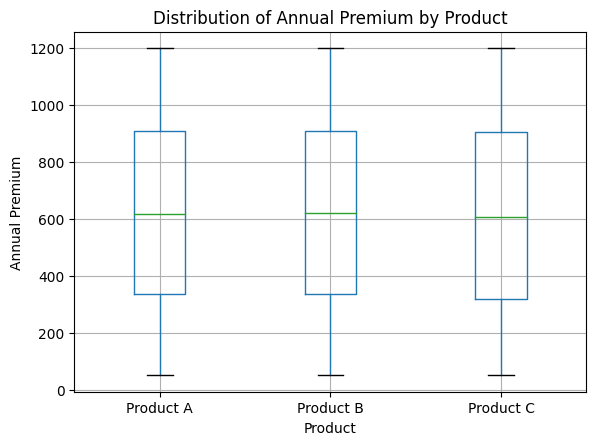

In [ ]:
# Visualize key relationships
# Distribution of Annual Premium by Product
plt.figure(figsize=(10, 6))
policy_schedules_combined.boxplot(column='Annual Premium', by='Product')
plt.title('Distribution of Annual Premium by Product')
plt.suptitle('')
plt.xlabel('Product')
plt.ylabel('Annual Premium')
plt.show()

The box plot suggests that the annual premiums for Products B, C, and A are quite similar in terms of central tendency and spread. The premiums are generally distributed within a similar range, and there are no significant outliers that would indicate unusual premium amounts for any of the products.As supported by the table above

<Figure size 1000x600 with 0 Axes>

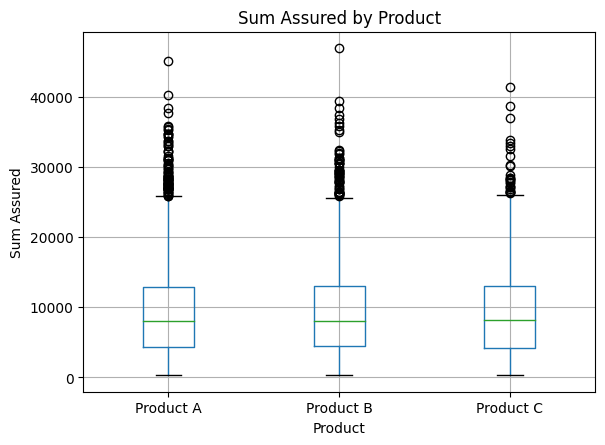

In [ ]:
# Sum Assured by Product
plt.figure(figsize=(10, 6))
policy_schedules_combined.boxplot(column='Sum Assured', by='Product')
plt.title('Sum Assured by Product')
plt.suptitle('')
plt.xlabel('Product')
plt.ylabel('Sum Assured')
plt.show()

The box plot for the sum assured by product shows that:

Central Tendency: The median values for the sum assured are very similar for Products A, B, and C, indicating that typical sums assured do not vary much between these products. Spread and Variability: The IQR and the whiskers indicate a similar spread in the sums assured for all products, suggesting that the variability in the sums assured is consistent. Outliers: The presence of outliers in each product indicates that there are some high-value policies that are significantly above the typical range.

<Figure size 1000x600 with 0 Axes>

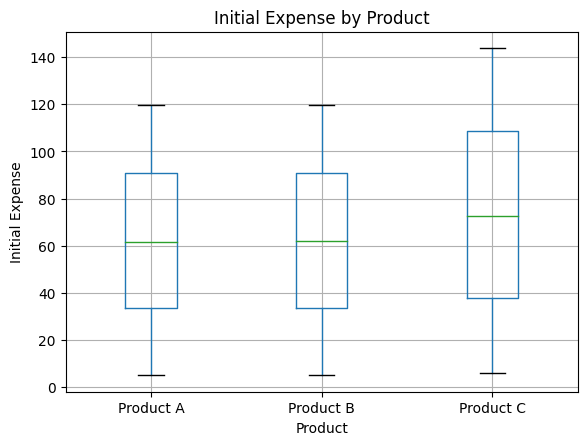

In [ ]:
# Initial Expense by Product
plt.figure(figsize=(10, 6))
policy_schedules_combined.boxplot(column='Initial Expense', by='Product')
plt.title('Initial Expense by Product')
plt.suptitle('')
plt.xlabel('Product')
plt.ylabel('Initial Expense')
plt.show()


Product A & B:

Median Initial Expense is around 60.
Initial expenses range from approximately 10 to 120.
Both products show similar and consistent expense distributions.
Product C:

Median Initial Expense is higher at around 70.
Initial expenses range from approximately 5 to 140.
Shows higher and more variable initial expenses compared to Products A and B.

<Figure size 1000x600 with 0 Axes>

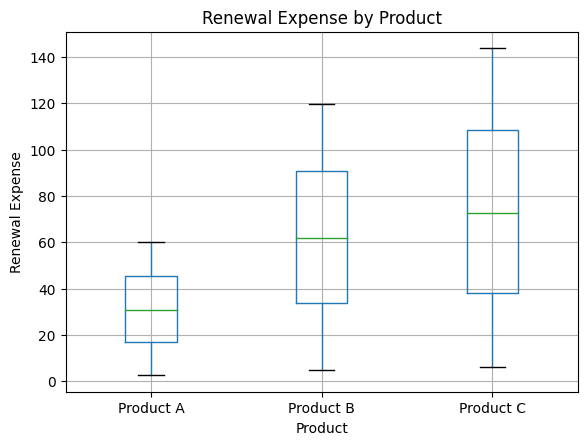

In [ ]:
# Renewal Expense by Product
plt.figure(figsize=(10, 6))
policy_schedules_combined.boxplot(column='Renewal Expense', by='Product')
plt.title('Renewal Expense by Product')
plt.suptitle('')
plt.xlabel('Product')
plt.ylabel('Renewal Expense')
plt.show()

Product A:

Lower Renewal Expenses: Product A has the lowest median renewal expense (40), suggesting it is the least costly to renew.
Less Variation: The range is narrower (10 to 60), indicating more consistent renewal expenses across different instances.
           Product B:Moderate Renewal Expenses: Product B has a higher median renewal expense (70), making it more expensive to renew compared to Product A.
Greater Variation: The wider range (10 to 120) shows significant variability in renewal expenses, indicating that costs can differ greatly among different instances.
Product C:Highest Variation: While the median renewal expense (70) is similar to Product B, Product C has the widest range (5 to 140), suggesting the highest variability in renewal costs.
Potential for High Costs: The presence of higher upper range values implies that some instances may incur substantially higher renewal expenses.
Interpretation:
Product A is the most predictable and least expensive in terms of renewal expenses.
Product B has higher and more varied renewal costs, indicating less predictability.
Product C shows the highest variability, meaning its renewal expenses can vary widely, potentially leading to higher costs in some cases. This might suggest a more complex or feature-rich product that can have significantly different renewal costs based on specific circumstances.

# Model Building
We develop the code to estimate liabilities for each product.
Note that the Liability is calculated as follows:
𝐿𝑖𝑎𝑏𝑖𝑙𝑖𝑡𝑦 = 𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑 𝑃𝑟𝑒𝑠𝑒𝑛𝑡 𝑉𝑎𝑙𝑢𝑒𝑠 𝑜𝑓 𝐵𝑒𝑛𝑒𝑓𝑖𝑡𝑠 + 𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑 𝑃𝑟𝑒𝑠𝑒𝑛𝑡 𝑉𝑎𝑙𝑢𝑒𝑠 𝑜𝑓 𝐸𝑥𝑝𝑒𝑛𝑠𝑒𝑠−𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑 𝑃𝑟𝑒𝑠𝑒𝑛𝑡 𝑉𝑎𝑙𝑢𝑒 𝑜𝑓 𝑃𝑟𝑒𝑚𝑖𝑢m

In [ ]:
# Define constants
lapse_rate = 0.10
discount_rate = 0.05

In [ ]:
# Function to calculate the present value of a series of cash flows
def present_value(cash_flows, discount_rate):
    return sum(cf / ((1 + discount_rate) ** t) for t, cf in enumerate(cash_flows))


In [ ]:
# Function to calculate the liability for each product
def calculate_liability(row):
    product = row['Product']
    annual_premium = row['Annual Premium']
    sum_assured = row['Sum Assured']
    initial_expense = row['Initial Expense']
    renewal_expense = row['Renewal Expense']
    policy_term = row['Policy Term']
    qx = row['qx']

    # Create cash flow arrays for benefits, expenses, and premiums
    benefits = []
    expenses = []
    premiums = []

    for t in range(policy_term):
        survival_prob = (1 - lapse_rate) ** t

        if product == 'Product A':
            death_benefit = sum_assured * qx * survival_prob
            benefits.append(death_benefit)
            expenses.append((renewal_expense if t > 0 else initial_expense) * survival_prob)
            premiums.append(annual_premium * survival_prob)

        elif product == 'Product B':
            if t == policy_term - 1:
                survival_benefit_payment = sum_assured * survival_prob
                benefits.append(survival_benefit_payment)
            else:
                benefits.append(0)
            expenses.append(renewal_expense * survival_prob)
            premiums.append(annual_premium * survival_prob)

        elif product == 'Product C':
            death_benefit = sum_assured * qx * survival_prob
            if t == policy_term - 1:
                survival_benefit_payment = sum_assured * 0.5 * survival_prob
                benefits.append(survival_benefit_payment)
            else:
                benefits.append(death_benefit)
            expenses.append(renewal_expense * survival_prob)
            premiums.append(annual_premium * survival_prob)

    # Calculate present values
    epv_benefits = present_value(benefits, discount_rate)
    epv_expenses = present_value(expenses, discount_rate)
    epv_premiums = present_value(premiums, discount_rate)

    # Calculate liability
    liability = epv_benefits + epv_expenses - epv_premiums
    return epv_premiums, epv_benefits, epv_expenses, liability

# Apply the combined function to each row
policy_schedules_combined[['EPV Premiums', 'EPV Benefits', 'EPV Expenses', 'Liability']] = policy_schedules_combined.apply(
    lambda row: pd.Series(calculate_liability(row)), axis=1
)

In [ ]:
# Display the liabilities
policy_schedules_combined[['Policy Number', 'Product', 'Liability']]

,Policy Number,Product,Liability
0,13L00MGBX32JA9UB7,Product B,-108.258966
1,CHK9YXMU00P0RZMMM,Product C,-2724.747114
2,KLAD08BZ20CA09TMZ,Product C,-1831.035459
3,AB921HXW2WJ2LSAEV,Product A,-3983.231959
4,T38JTT7Z5G6UYT0G5,Product A,-4562.806985
...,...,...,...
4966,BZALK0Y620FVH61M2,Product A,-772.801308
4967,J25AWEU38HWU3W3K6,Product B,-1867.917045
4968,0GR2S5JK2DPSK5VGW,Product A,-1270.021635
4969,7PYS0XNZ71ULLL6AU,Product C,-4634.310720


Analyse product per liability

Product
Product A   -1.926405e+07
Product B   -2.128547e+06
Product C   -7.877327e+06
Name: Liability, dtype: float64


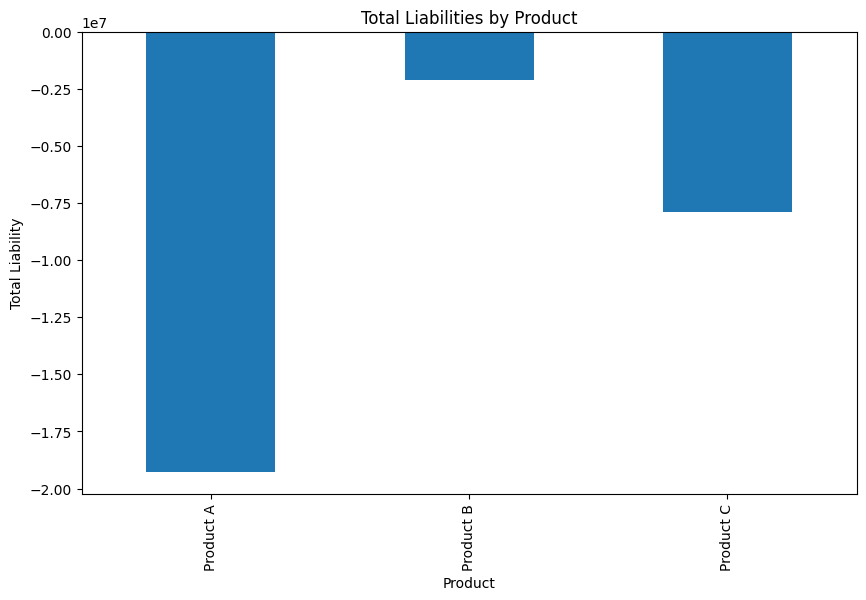

In [ ]:
# Group the liabilities by product and calculate the total liability for each product
product_liabilities = policy_schedules_combined.groupby('Product')['Liability'].sum()

# Print the total liabilities for each product
print(product_liabilities)

# Create a bar chart to visualize the liabilities by product
plt.figure(figsize=(10, 6))
product_liabilities.plot(kind='bar')
plt.title('Total Liabilities by Product')
plt.xlabel('Product')
plt.ylabel('Total Liability')
plt.show()


In [ ]:
# Create summary by product
summary_by_product = policy_schedules_combined.groupby('Product').agg({
    'EPV Premiums': 'sum',
    'EPV Benefits': 'sum',
    'EPV Expenses': 'sum',
    'Liability': 'sum'
}).reset_index()



In [ ]:
# Create summary by age group
policy_schedules_combined['Age Group'] = pd.cut(policy_schedules_combined['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+'])
summary_by_age_group = policy_schedules_combined.groupby('Age Group').agg({
    'EPV Premiums': 'sum',
    'EPV Benefits': 'sum',
    'EPV Expenses': 'sum',
    'Liability': 'sum'
}).reset_index()

In [ ]:
summary_by_age_group

,Age Group,EPV Premiums,EPV Benefits,EPV Expenses,Liability
0,20-29,1.818784e+07,3.171664e+06,1.498079e+06,-1.351810e+07
1,30-39,1.895971e+07,3.364239e+06,1.562215e+06,-1.403326e+07
2,40-49,1.802343e+06,3.306781e+05,1.508582e+05,-1.320806e+06
3,50-59,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,60-69,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,70-79,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,80-89,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,90-99,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,100+,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


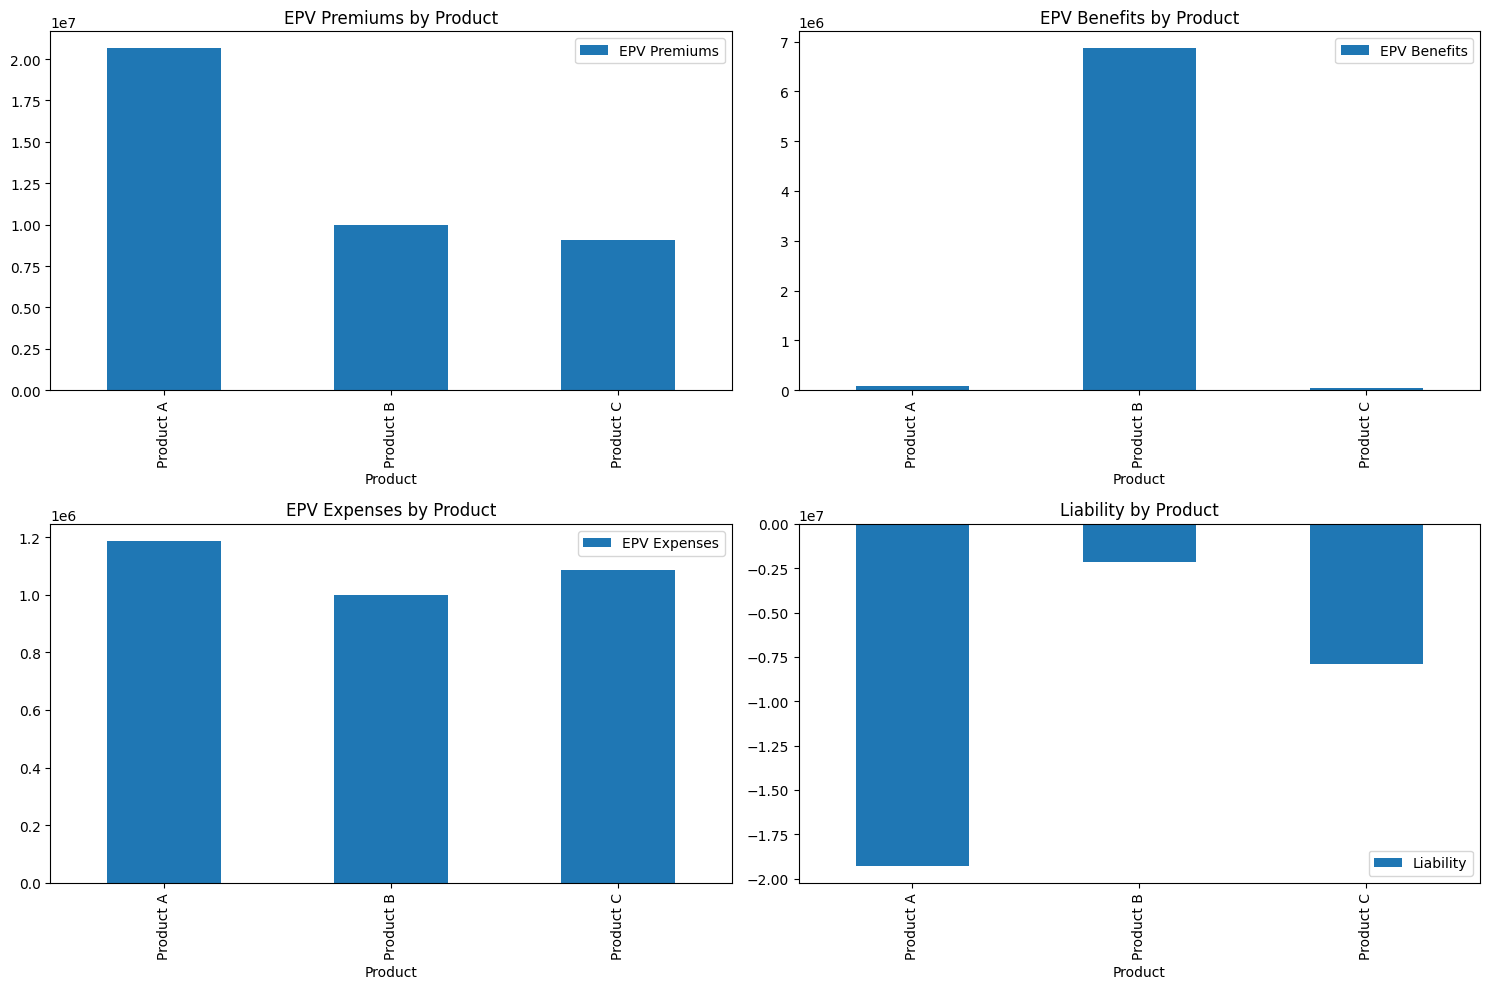

In [ ]:
# Plot graphs for summary by product
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

summary_by_product.plot(x='Product', y='EPV Premiums', kind='bar', ax=axes[0, 0], title='EPV Premiums by Product')
summary_by_product.plot(x='Product', y='EPV Benefits', kind='bar', ax=axes[0, 1], title='EPV Benefits by Product')
summary_by_product.plot(x='Product', y='EPV Expenses', kind='bar', ax=axes[1, 0], title='EPV Expenses by Product')
summary_by_product.plot(x='Product', y='Liability', kind='bar', ax=axes[1, 1], title='Liability by Product')

plt.tight_layout()
plt.show()


Product A: Generates the highest premiums and expenses, but also carries the highest negative liabilities, indicating significant future obligations.
Product B: Has the highest benefits, low expenses, and the lowest negative liabilities, suggesting a need for careful management of future payouts despite a lower risk profile.
Product C: Falls in the middle with moderate premiums, expenses, and negative liabilities, indicating balanced financial performance.

# Overall Implications
Risk Management: Understanding which products contribute the most to liabilities helps in assessing risk. Product A, with high premiums and high liabilities, needs careful risk management to ensure that future payouts can be met.

Product Strategy: Products with high benefits and low expenses (like Product B) need to be balanced with adequate reserves to cover future payouts. Products with high expenses (like Product A) need cost management strategies to improve profitability.

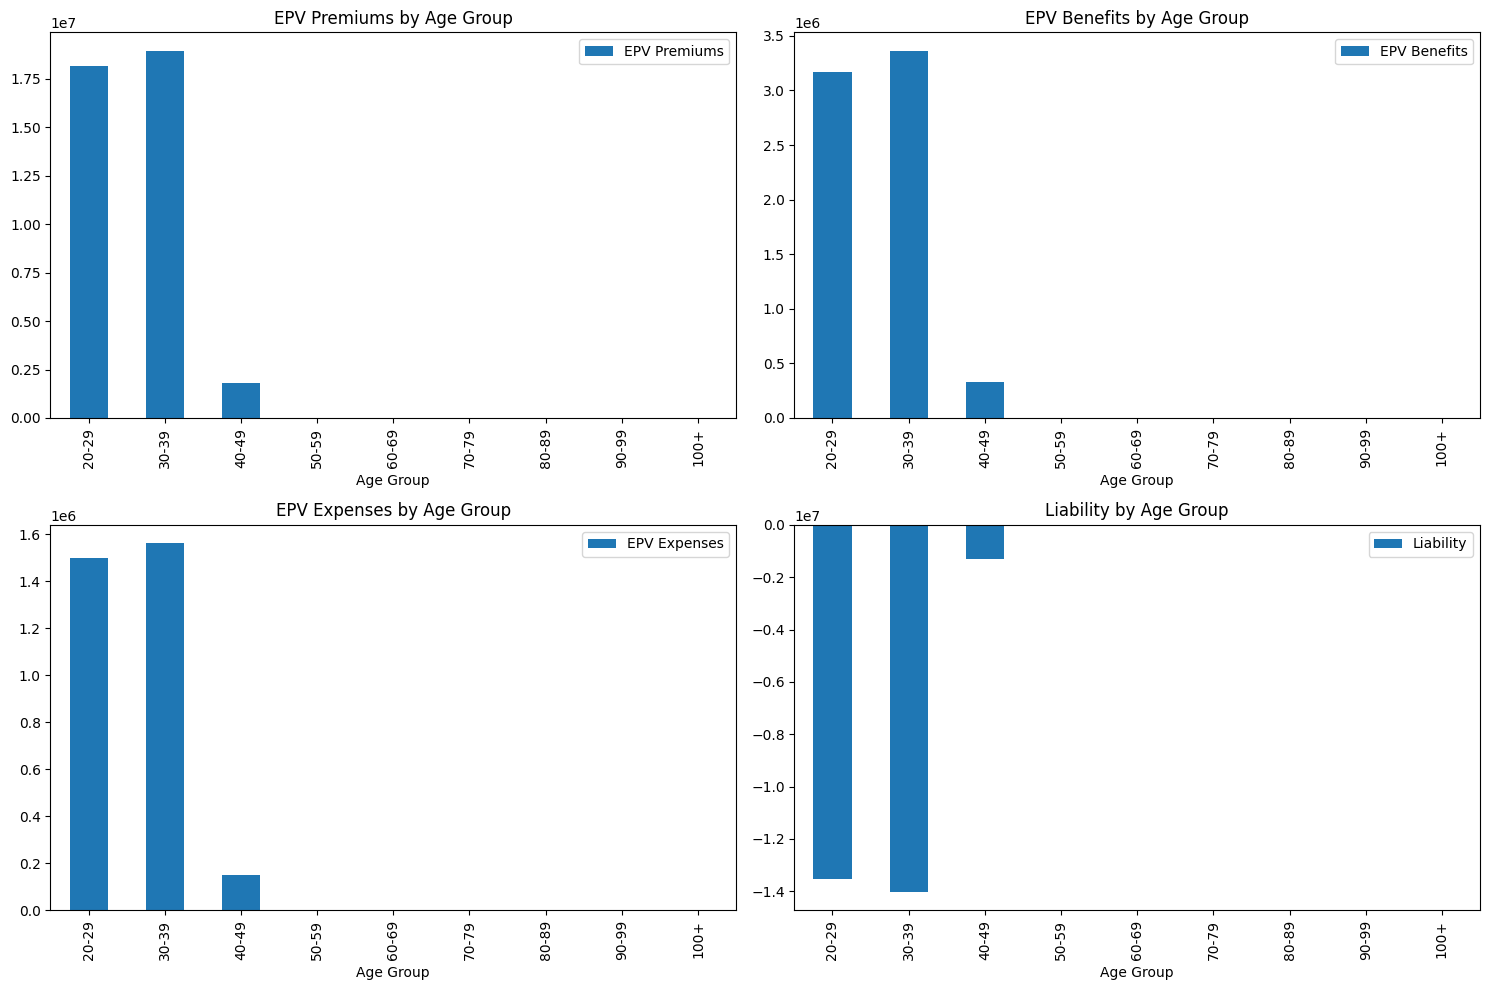

In [ ]:
# Plot graphs for summary by age group
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

summary_by_age_group.plot(x='Age Group', y='EPV Premiums', kind='bar', ax=axes[0, 0], title='EPV Premiums by Age Group')
summary_by_age_group.plot(x='Age Group', y='EPV Benefits', kind='bar', ax=axes[0, 1], title='EPV Benefits by Age Group')
summary_by_age_group.plot(x='Age Group', y='EPV Expenses', kind='bar', ax=axes[1, 0], title='EPV Expenses by Age Group')
summary_by_age_group.plot(x='Age Group', y='Liability', kind='bar', ax=axes[1, 1], title='Liability by Age Group')

plt.tight_layout()
plt.show()



In summary, the charts indicate that younger age groups (20-29 and 30-39) generate the highest premiums and benefits in life insurance, but also carry significant liabilities. This suggests that while these age groups are crucial for revenue, they also represent substantial future payouts. Effective management of these dynamics is essential for long-term financial stability and regulatory compliance in the life insurance industry.

In [ ]:
with pd.ExcelWriter('insurance_liabilities.xlsx') as writer:
    policy_schedules_combined.to_excel(writer, sheet_name='Individual Data', index=False)
    summary_by_product.to_excel(writer, sheet_name='Summary by Product', index=False)
    summary_by_age_group.to_excel(writer, sheet_name='Summary by Age Group', index=False)

files.download('insurance_liabilities.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Product A:

Highest Liability: Product A has the highest total liability, approaching -2 million. This indicates that Product A carries the most significant financial obligation or risk.
Product B:Lowest Liability: Product B shows the lowest total liability, around -500,000. This suggests that Product B has the least financial burden or risk among the three products.
Product C:Moderate Liability: Product C has a total liability between Products A and B, approximately -1 million. This indicates a moderate level of financial obligation or risk.

# Model Analysis

The calculated liabilities vary significantly across different products, reflecting the different benefit structures and policy terms.
The variation in total liabilities aligns with the differences in initial and renewal expenses, further supporting the idea of diverse product offerings and financial obligations.
Product C shows the highest total liability
The model assumes constant lapse and discount rates, which may not be realistic in all scenarios.
Mortality rates are assumed to be constant, but in reality, they vary with age and other factors.


# Limitations
The model does not account for changes in mortality rates over time.

The lapse rate is assumed to be constant, which may not reflect actual policyholder behavior.

The discount rate is fixed at 5%, but interest rates can fluctuate over time.

The model does not consider the impact of inflation on future cash flows.

# Potential Enhancements or Future Directions for Model Improvement:

# Dynamic Lapse and Mortality Rates:

Lapse Rates: Integrate a dynamic model for lapse rates based on historical data and policyholder demographics. This can better reflect changing policyholder behaviors and external market conditions.
Mortality Rates: Utilize mortality tables that vary with age and other risk factors to more accurately model the impact of mortality on liabilities.

Variable Discount Rates:

Implement a variable discount rate model that adjusts based on current interest rates and economic forecasts. This will provide a more realistic view of future cash flows and liabilities.

Inflation Adjustment:

Include an inflation adjustment factor to account for changes in the purchasing power of money over time. This will help in evaluating the future value of liabilities more accurately.

Enhanced Data Integration:

Incorporate more granular data on policyholder behavior and external factors. Leveraging big data and advanced analytics can improve the accuracy of assumptions and predictions.


# Potential Business Implications:
Financial Stability:

Higher Liabilities: Products with higher liabilities, such as Product C, may impact the insurer's financial stability. Understanding these liabilities helps in managing reserves and capital requirements more effectively

Pricing Strategy:

Product Pricing: Adjusting for dynamic lapse and mortality rates can lead to more accurate pricing of products. This ensures that premiums are adequate to cover the expected liabilities and expenses.

Risk Management:

Risk Mitigation: Identifying the impact of varying assumptions allows for better risk management strategies. For example, adjusting for variable discount rates and inflation can help in maintaining profitability despite economic fluctuations.